# Sistemas Individuales





In [66]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit

Cuando hablamos de **sistemas individuales**, nos referimos al estudio y comprensión de un único estado cuántico en un dispositivo. Esta comprensión es fundamental para escalar estos sistemas y hacerlos operar junto con otros más complejos.


# Introducción

La idea es explorar los paralelos que existen en la información clásica e información cuántica. Veremos unas definiciones que nos permitirán construir una intuición de computo cuántico a partir de conjunto de términos de encontraremos en teoría probabilidades básicas y álgebra lineal. 

- **Información Clásica**
- **Información Cuántica**
    1. **Vectores de Estado Cuántico**: Representación matemática de los estados cuánticos mediante vectores con entradas complejas.
    2. **Mediciones en la Base Estándar**: Cómo extraer información clásica de estados cuánticos a través de mediciones.
    3. **Operaciones Unitarias**: Descripción de la evolución temporal de sistemas cuánticos mediante matrices unitarias.

### Descripciones de información cuántica

Existen dos descripciones fundamentales para entender la **información cuántica**:

- **Descripción Simplificada**: Los estados cuánticos se representan como **vectores** y las operaciones como **matrices unitarias**. Esta descripción es adecuada para sistemas ideales sin ruido y es suficiente para comprender muchos algoritmos cuánticos.
- **Descripción General**: En presencia de **ruido**, es más apropiado utilizar **matrices de densidad** para representar los estados cuánticos. Esta descripción permite modelar efectos de decoherencia y es esencial para estudios avanzados en teoría de la información cuántica y criptografía cuántica.

Tanto la descripción simplificada como la **información clásica** pueden considerarse casos particulares dentro de la **teoría general de la información cuántica**.

### Información Clásica

Para comprender la información cuántica, es útil revisar primero los conceptos de **información clásica**. Consideremos un sistema que almacena información clásica, al que llamaremos $X$. Este sistema tiene un conjunto finito y no vacío de **estados clásicos**, denotado como $\Sigma$.
 
Por ejemplo:

- Si $X$ es un **bit**, entonces sus estados posibles son: 
	$$\Sigma = \{0, 1\}$$
- Si $X$ es un **dado de seis caras**, entonces: 
$$\Sigma = \{1, 2, 3, 4, 5, 6\}$$

Consideremos que estamos estudiando un bit, que solo alberga 0 y 1.

$$X_{\{0,1\}}$$ 


En el **procesamiento de la información**, a menudo trabajamos con situaciones donde nuestro conocimiento sobre el estado de $X$ es **incierto**. Podemos representar esta incertidumbre asignando **probabilidades** a cada estado clásico. Por ejemplo, si $X$ es un bit y lo tenemos guardado en una caja que no podemos ver,  podemos tenerlo en el estado clásico de 0 o 1, en si no vemos la probabilidad,  tenemos un estado concreto cuando vemos el estado, a estos dos estados los podremos asignar de manera arbitraria con cierta probabilidad de ser, denotada así:

$$Pr(X=0)= \frac{3}{4}$$
$$Pr(X=1)= \frac{1}{4}$$
Si sumamos las fracciones anteriores tenemos que ambas probabilidades suman la unidad.  Estas probabilidades deben cumplir que su suma es igual a 1. 

Podemos representar este estado probabilístico mediante un **vector de probabilidad** en la que todas las entradas son número reales no negativos:

$$\mathbf{Pv} = \begin{pmatrix} \frac{3}{4} \\ \frac{1}{4}  \end{pmatrix}$$



In [67]:
# Podemos crearlo sin problemas con numpy
pv = np.array([3/4, 1/4])
pv # array([0.75, 0.25])

array([0.75, 0.25])

### Notación de Dirac


La **Notación de Dirac** es ampliamente utilizada en mecánica cuántica para simplificar la representación de vectores y facilitar el cálculo de operaciones. En computación cuántica, es esencial para lograr un entendimiento común sobre el orden y la naturaleza de las operaciones. Esta notación permite representar tanto vectores columna (**ket**) como vectores fila (**bra**).

#### Ket

Se presentan a continuación las bases más relevantes, como un **Ket**:

$$\mathbf{\Ket{0}} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$
$$\mathbf{\Ket{1}} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

- $\ket{0}$ y $\ket{1}$ forman una base ortonormal en un espacio de Hilbert de dos dimensiones.



In [68]:
# Vectores ket
ket_0 = np.array([[1],
                  [0]])
ket_1 = np.array([[0],
                  [1]])

Podemos expresar cualquier vector en sus vectores base, cada vector puede ser expresado como una combinación lineal única. Este es un principio fundamental en espacios vectoriales. Por ejemplo podríamos representar el ejemplo anterior así:

$$ \begin{pmatrix} \frac{3}{4} \\ \frac{1}{4}  \end{pmatrix}=\frac{3}{4}\ket{0} + \frac{1}{4}\ket{1}$$

Este vector podría representar, por ejemplo, un estado probabilístico en un sistema clásico o un estado cuántico si se interpretan los coeficientes adecuadamente. 

In [69]:
# Coeficientes de la combinación lineal
alpha = 3/4
beta = 1/4

# Estado combinado
ket_combined = alpha * ket_0 + beta * ket_1

# El estado previo denotado por la variable pv
print("Estado combinado |\u03C8>:\n", ket_combined)


Estado combinado |ψ>:
 [[0.75]
 [0.25]]


#### Bra

Cuando estamos hablando en términos de filas $\bra{a}$ , usaremos la anterior notación. **Bra**, estos son los vectores duales de los **Ket** y que se obtienen mediante la transposición y conjugación compleja.

$$\bra{0}=(1 0)$$ 
$$\bra{1}=(0 1)$$

In [70]:
# Vectores bra (conjugado transpuesto de los ket)
bra_0 = ket_0.conj().T
bra_1 = ket_1.conj().T

#### **Producto Interno (Bra-Ket)**


En general al multiplicar un **Bra** por un **Ket**, podemos pensarlos como una multiplicación entre una fila y una columna. Se obtiene el **producto interno**, que es un escalar.

$$\begin{pmatrix} * & *  \end{pmatrix} \begin{pmatrix} * \\ *  \end{pmatrix}=(*)$$
$$\braket{a|b} = \bra{a}\ket{b}$$



Veamos varios ejemplos para familiarizarnos con la notación y sus alcances tempranos.

- Para estados ortogonales:
$$\braket{0|1} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0
0$$

$$\braket{0|1} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = (1 \cdot 0) + (0 \cdot 1) = 0 + 0 = 0$$


In [71]:
# Producto interno entre <0| y |1>
inner_product_01 = np.dot(bra_0, ket_1)
print("<0|1> =", inner_product_01[0][0])


<0|1> = 0



- Para estados idénticos, es decir cuando ambas entradas son 0, es un prodcuto entro dos vectores:
	
$$\braket{0|0} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 1$$

$$
\braket{0|0} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = (1 \cdot 1) + (0 \cdot 0) = 1 + 0 = 1
$$

In [72]:
# Producto interno entre <0| y |0>
inner_product_00 = np.dot(bra_0, ket_0)
print("<0|0> =", inner_product_00[0][0])

<0|0> = 1


Por ejemplo si las entradas están alineadas tendremos que el resultado es 1, de lo contrario será 0. Entradas alineadas:

$$\begin{pmatrix} 0 & 1 & 0  \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}=(1)$$

$$
\begin{pmatrix} 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} = (0 \cdot 0) + (1 \cdot 1) + (0 \cdot 0) = 0 + 1 + 0 = 1
$$

Entradas no alineadas, harán que cada porducto sea 0 y al suamr dará 0
$$\begin{pmatrix} 1 & 0 & 0  \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}=(0)$$

La operación anterior la podemos expresar como $\braket{a|b}$, lo cual también podemos llamar **Producto Interno**. 
$$\braket{a|b} = \bra{a}\ket{b}$$


#### Multiplicación Ket-Bra y Operadores


El orden importa, si multiplicamos un **Ket** * **Bra** el resultado será una matriz, o también llamado un **operador**:

$$\begin{pmatrix} * \\ *  \end{pmatrix}\begin{pmatrix} * & *  \end{pmatrix} =\begin{pmatrix} * & * \\ * & * \end{pmatrix} $$

En el alfabeto binario si multiplicamos un **Ket** por un **Bra** tendríamos algo así:

- **Operador de proyección** en $\ket{0}$, el operador está definido por la siguiente formalidad: $\hat{P} = \ket{\psi}\bra{\psi}$.

    - **Propiedad:** El operador $\hat{P}$ proyecta cualquier estado $\ket{\phi}$ en el estado $\ket{\psi}$, en otras palabras.

$$\ket{0}\bra{0} = \begin{pmatrix} 1 \\ 0  \end{pmatrix}\begin{pmatrix} 1 & 0  \end{pmatrix} =\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}  $$



Si continuamos cambiando el estado determinista en las posiciones del 1, podremos ver que la entrada con 1 se mueve a en la matriz. 

- **Operador de transición** de $\ket{1}$ a $\ket{0}$:
$$\ket{0}\bra{1} = \begin{pmatrix} 1 \\ 0  \end{pmatrix}\begin{pmatrix} 0 & 1  \end{pmatrix} =\begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}  $$

Estas operaciones deterministas abren juego a que trabajemos con operaciones matriciales  y entender su conexión.

In [73]:
# Operador proyección |0><0|
operator_00 = np.dot(ket_0, bra_0)
print("Operador |0><0|:\n", operator_00)

# Operador transición |0><1|
operator_01 = np.dot(ket_0, bra_1)
print("Operador |0><1|:\n", operator_01)


Operador |0><0|:
 [[1 0]
 [0 0]]
Operador |0><1|:
 [[0 1]
 [0 0]]


In [74]:
# Podemos usar matmul para matrix-matrix or matrix vector multiplciation
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])
ket1 = np.array([0, 1])

np.matmul(M1, ket1)

array([1, 0])

### Midiendo Estados Probabilísticos

Cuando observamos el sistema $X$ mientras está en un **estado probabilístico**, lo que veremos es un **estado clásico** seleccionado aleatoriamente de acuerdo con las **probabilidades** asignadas. Por ejemplo, si hay una probabilidad de $\dfrac{3}{4}$ de que $X=0$ y una probabilidad de $\dfrac{1}{4}$ de que $X=1$, al medir el sistema observaremos el estado $0$ con probabilidad $\dfrac{3}{4}$ y el estado $1$ con probabilidad $\dfrac{1}{4}$.

La medición cambia nuestro conocimiento sobre el sistema y, por lo tanto, actualiza el estado probabilístico que le asociamos. Si reconocemos que $X$ está en el estado clásico $a \in \Sigma$, entonces el nuevo vector de probabilidad que representa nuestro conocimiento es un vector que tiene un $1$ en la entrada correspondiente a $a$ y $0$ en las demás. Esto indica que ahora sabemos con certeza que $X$ está en el estado $a$.

Denotamos este vector como $\ket{a}$, conocido como un **vector base estándar** o **ket**. Por ejemplo, si el sistema es un bit, los vectores base son:

$$\ket{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \ket{1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$


Cualquier vector columna de dos dimensiones puede expresarse como una **combinación lineal** de estos vectores. Por ejemplo:

$$\begin{pmatrix} \dfrac{3}{4} \\[2mm] \dfrac{1}{4} \end{pmatrix} = \dfrac{3}{4}\ket{0} + \dfrac{1}{4}\ket{1}$$


Este concepto se generaliza a cualquier conjunto de estados clásicos: cualquier vector de probabilidad puede expresarse como una combinación lineal de los estados base correspondientes.



#### Ejemplo con una Moneda

Supongamos que lanzamos una moneda justa y la cubrimos antes de observarla. El estado probabilístico de la moneda es:


$$\begin{pmatrix} \dfrac{1}{2} \\[2mm] \dfrac{1}{2} \end{pmatrix} = \dfrac{1}{2}\ket{\text{cara}} + \dfrac{1}{2}\ket{\text{cruz}}
$$
Donde los vectores base son:

$$\ket{\text{cara}} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad \ket{\text{cruz}} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

Al descubrir la moneda y observarla, veremos uno de los dos estados clásicos: "cara" o "cruz". Si el resultado es "cruz", actualizamos nuestra descripción del estado probabilístico a:

$$\ket{\text{cruz}} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

Si volviéramos a cubrir y descubrir la moneda, seguiríamos observando "cruz", lo cual es consistente con el estado probabilístico actualizado. Este proceso demuestra cómo la medición afecta nuestro conocimiento del sistema, pero no necesariamente cambia el estado físico real.

Es importante notar que las mediciones de estados probabilísticos pueden representar nuestro **conocimiento o creencia**, no necesariamente el estado físico actual del sistema. Diferentes observadores pueden tener diferentes vectores de probabilidad asociados al mismo sistema, dependiendo de la información que tengan

### Operaciones Deterministas

Estas operaciones no tienen ninguna aleatoreidad o incertidumbre asociada, podemos describir estas operaciones como una función, donde $f:\Sigma$  ->$\Sigma$ expresando que esta función simplemente transforma el estado clásico $a$ en $f(a)$ para cada $a$ que pertenece a $\Sigma$.

Dada cualquier función, existirá una matriz $M$ única que satisface:

$$M\ket{a} = \ket{f(a)}$$

Nos interesa entender de lo anterior lo siguiente, cuando estamos trabajando con estados probabilísticos y realizamos una operación determinística en este sistema, el resultado probabilístico que resulta puede ser obtenido por una multiplicación **Matriz-Vector**, es decir si tenemos un vector v, que es probabilístico y realizamos una operación determinista, obtendremos un resultado probabilista expresado por el producto de esta matriz y el vector original. Es decir, "mapearemos" el vector probabilístico a otro.

$$v \mapsto Mv$$
Si seguimos utilizando la notación de Bra-Ket para representar nuestros vectores,  podemos representar:

$$M\ket{a} = \ket{f(a)} (1.1)$$ 
Podemos expresar la matriz en términos de :

$$M= \Sigma_{b\epsilon\Sigma}\ket{f(b)}\bra{b}$$
Si reemplazáramos esto en la ecuación (1.1),  resultaríamos con la siguiente expresión para M, y como de antemano sabemos del alfabeto de vectores unitarios, que el resultado de operarlos entre sí en cierto orden, determina que sus entradas y productos resulten en 0 o en 1,de la siguiente formula entre $a$ y $b$ podemos decir si el producto será ceros o unos, dado que **la operación de un vector fila y una columna es siempre un escalar**.


$$M= \Sigma_{b\epsilon\Sigma}\ket{f(b)}\braket{b|a}$$


### Operaciones Probabilísticas


Son operaciones clásicas que pueden introducir incertidumbre o aleatoriedad, es decir son un cas especial de las operaciones determinísticas que asignan de manera arbitraria determinada probabilidad al bit. 
**Ejemplo**:
- Si tenemos que nuestro Bit vale 0, entonces no haga nada.
- Si nuestro Bit vale 1, entonces asigna la probabilidad de $\frac{1}{2}$

Podemos representar estas operaciones en una matriz estocástica, estas matrices se caracterizan porque en todas ss entradas tenemos números de forma que al sumar cada entrada en cada columna debe sumar 1, ejemplo, la primera matriz puede expresarse en su factores, y de alguna manera tendríamos una especia de "aleatoreidad" o distribución de probabilides harcodeada que usaremos para ciertas operaciones deterministas.

$$\begin{pmatrix} \frac{1}{2} & 1 \\ \frac{1}{2} & 0 \end{pmatrix}= \frac{1}{2}\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} + \frac{1}{2}\begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix} $$

### Componiendo Operaciones

El termino de **Componer** operaciones hace referencia a aplicar diferentes operaciones matriciales una tras otra, utilizando nuestras matrices aleatorias, podemos aplicar sobre un vector.. 


$$M_{2}(M_{1}v) = (M_{2}M_{1})v $$


Es importante entender que cada vez que apliquemos estas operaciones nuestro resultado siempre será estocástico, ya que no podemos salirnos de este set de resultados. El orden importa en el momento de realizar multiplicaciones entre las matrices, no es lo mismo *"Succionar un cigarrillo antes de encenderlo es diferente que encender el cigarillo y succionar".  

De allí que la representación de las operaciones de las matrices vayan de $M_{(n...1)}$ y que estén agrupadas en fila. Las operaciones se pueden agrupar en el orden que se van aplicando al vector.



## Información Cuántica


Un estado cuántico de un sistema es representado por un vector columna el cual:

- Sus entradas son números complejos, ( En comparación con las operaciones deterministas)
- Y la suma de los valores absolutos al cuadrado de todas las entradas debe ser igual a 1, es decir si calculamos la distancia euclidiana o la norma euclidiana, podremos verificar que el vector es en efecto un estado cuántico válido.
$$|a|^2 + |b|^2 = 1$$

En un nivel físico se encuentra que modelar estos sistemas en términos de vectores, es una representación válida y acertada, y en términos computacionales significa que las entradas 0 y 1, son números complejos, $0 + i$, $1 + i$, donde $i=0$.

Ejemplos de estados cuánticos, en particular no tienen ningún nombre, pero son estados recurrentes que veremos en computación cuántica. 

$$\ket{+} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$$
$$\ket{-} = \frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{1}$$

### Midiendo estados cuánticos

¿Qué podemos hacer con un estado cuántico?, ¿Para qué tenerlo en vectores?, ¿Cómo interactuar con este?.

Es el mecanismo de extraer información clásica de estaos estados cuánticos. No podemos ver estados probabilísticos, vemos estados clásicos. La medición es lo que nos dará esa interface.

- **Standard Basis Measurement**
- **Projection Measurement**
- **POVM**: Positive Objective Measurement.

La forma de medición estándar para un estado cuántico, será una forma de medición que tenemos. Cuando queremos medir un estado cuántico obtendremos información clásica de este:

-  Los posibles resultados son estados clásicos.
- La probabilidad para cada estado clásico  de ser el resultado es:
	$$|a|^2 + |b|^2 = 1$$
Por ejemplo si tomamos como ejemplo el Ket +, tendremos que produciría un resultado del tipo:
$$\ket{+} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}$$

$$Pr(Resultado - 0) = |\frac{1}{\sqrt{2}}|^2 =\frac{1}{2}$$
$$Pr(Resultado - 1) = |\frac{1}{\sqrt{2}}|^2 =\frac{1}{2}$$
Ambas probabilidades son la misma, por lo que si medimos, obtendríamos una bit que viene de una distribución aleatoria uniforme de  50 %.  Si midiéramos el $\Ket{0}$ y $\Ket{1}$ darían 0 y 1 en sus estados clásicos. Porque el valor absoluto al cuadrado de 0 y 1, son 0 y 1 respectivamente. Aquí es donde empezamos a hablar de que este estado colapsa, y matemáticamente lo podríamos explorar así aunque aún sea un tema de trabajo en mecánica cuántica.

In [75]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3]) # Mal vector

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [76]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [77]:
# Podemos comprobar si es un vector válido así:
display(u.is_valid())
display(w.is_valid())

True

False

Para realziar mediciones en estádos válidos solo necesitamos utilizar este método. Pata visualizar las probabilidades de tener 0,1, lo que haremos será realizar una simulación de "número de mediciones" para el sistema, y así tener una muestra representativa. De las probabilidades


In [78]:
v.measure()

(np.str_('0'),
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{np.str_('0'): np.int64(565), np.str_('1'): np.int64(435)}

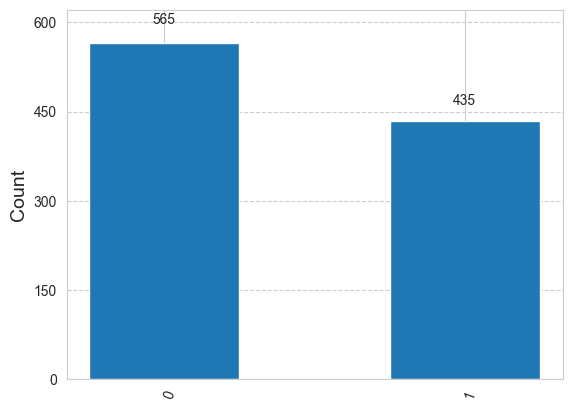

In [79]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)


### Operaciones Unitarias


Las operaciones permitidas que se pueden realizar sobre un estado cuántico son diferentes a las permitidas en la información clásica. En vez de representar una matriz estocástica para un vector clásico, en información clásica hablaremos de **Matrices Unitarias**.

Es una matriz cuadrada $U$ que tiene números complejos de entradas, es unitaria si satisface la igualdad:
$$U^\dagger U = 1 = UU^\dagger$$ 
Donde la operación con la daga, expresa lo que es la transpuesta conjugada de la matriz. Dee cumplirse que al calcular la norma euclidiana entre la matriz $U$ y un vector $v$ debe ser así:

$$||Uv||=||v||$$
Esto define ese conjunto de operacioens que vamos a precisar considerar siempre que trabajemos con matrices probabilisticas

In [80]:
# Creemos un estado vector sencillo
v = Statevector([1, 0])

### Qubit Unitary Operations

Las transformaciones de un estado cuántico son transformaciones lienales efectuadas por una matriz unitaria, u operadores unitarios que tranforman el estado cuántico en otro estado cuántico, la idea es variar las probabilidades. 

(Matrices de Pauli) Son las llamadas operaciones de pauli, son hermiticas y tienen su adjunto.X y Z son llamadas bip flip y phase flip dado que estas compuertas hacen un cambioTh del estado.

$$X\ket{0}=\ket{1}$$

####  Flip Phase para los dos estados.

$$Z\ket{0}=\ket{0}$$

$$Z\ket{1}=-\ket{1}$$

In [81]:
X = Operator([[0, 1], [1, 0]])
v.evolve(X)
v.draw("text")

[1.+0.j,0.+0.j]

Este cambio habla de dos compuertas aplicadas en un estado cuántico `Statevector`

In [82]:
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
v.evolve(Y)
v.evolve(Z)
v.draw("text")

[1.+0.j,0.+0.j]

#### Operación de Hadamard

Es quizá uno de los operadores más relevantes cuando estamos hablando de computación cuántica en el sentido de que no existe un análogo en computación clásica que facilite describir este comportamiento. Aquí tenemos acción de esta compuerta sobre los siguientes estados:

$$

H |0\rangle = H \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
\begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} 
= |+\rangle $$

$$
H |1\rangle = H \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
\begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} 
= |-\rangle
$$

Aquí podemos apreciar el comportamiento de Hamadar aplicado a estados superpuestos, lo cua facilitará ver la propiedad de ser reversibles una vez más.

$$

H |+\rangle = H \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} 
= \begin{bmatrix} 1 \\ 0 \end{bmatrix} 
= |0\rangle
$$

$$
H |-\rangle = H \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} 
= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} 
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} 
= \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= |1\rangle


$$

#### Phase Operation


Son todas las operacioens que pueden describirse por la matriz, donde "tetha" es cualquier número real y el componente inferior siempre será un número complejo

$$P_{\theta} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix} $$
Por ejemplo podemos usar **S**, **T**, para cambiar la fase.

$$S_{\frac{\pi}{2}} = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} $$
$$T_{\frac{\pi}{4}} = \begin{pmatrix} 1 & 0 \\ 0 & \frac{1+i}{\sqrt{2}} \end{pmatrix} $$
Este es un ejemplo de cómo operarían ls computeras de Hadamard sobre un estado de un qubit cualquiera:

$$H(\frac{1+2i}{3}\ket{0}- \frac{2}{3}\ket{1})=\begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix}\begin{pmatrix} \frac{1+2i}{\sqrt{3}} \\ -\frac{2}{3} \end{pmatrix}= \begin{pmatrix} \frac{-1+2i}{3\sqrt{2}} \\ \frac{2}{3\sqrt{2}} \end{pmatrix}$$


El resultado anterior se puede convertir por conveniencia a la notación de dirac.

$$\frac{-1+2i}{3\sqrt{2}} \ket{0} + \frac{2}{3\sqrt{2}} \ket{1}$$

Lo que nos interesa saber de las operaciones unitarias cuánticas es:

1. Son operaciones que dado su linealidad al multiplicar las matrices y vectores tenemos una forma fácil  y sencilla de operar los estados cuánticos con matrices unitarias que afectarán las amplitudes de probabilidad, que en ultimas nos retorna la probabilidad de tener 0 o 1.

2. Dado lo anterior tenemos muchas formas de "mover las perillas" que son caminos o rutas de este estado para alcanzar un resultado.

3. Las operaciones cuánticas dado su **reversibilidad**, permiten "retroceder" al estado anterior. Podría pensarlo como un "espejo", pero no significa que el estado anterior sea el mismo que el inicial. $HSH$


In [83]:
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

### Composisción de operaciones unitarias.

La composición de operaciones unitarias está representado por una multiplicación de matrices. Donde el orden se copone de derecha a izquierda donde la matiz mas próxima es la que se aplica primero. Por ejemplo en el circuito $HSH$ Tenemos un estado resultante que expresa las operaciones aplicadas sobre el estado del qubit. $HSH^2$ al hacer dos veces esta misma operación, obtenemos el estado inicial invertido, como si lo hubiéramos cambiado de valor de 0 a 1 con una compuerta $X$


$$
R = HSH = \begin{bmatrix} \frac{1}{\sqrt{2}} && \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} && -\frac{1}{\sqrt{2}} \end{bmatrix}
\begin{bmatrix} 1 && 0 \\ 0 && i \end{bmatrix}
\begin{bmatrix} \frac{1}{\sqrt{2}} && \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} && -\frac{1}{\sqrt{2}} \end{bmatrix}  
$$

Esta composición es particualrmente interesante, si tomamos la raíz cuadrada de $R^2$ equivale a operar dos vez la compuerta **NOT** , esta operación es interesante y difiere a lo clásico porque al tomar la raíz cuadrada de un número negativo no es posible.

In [92]:
# Muestra elemental de circuito HSH
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)

circuit.draw()

┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├
   └───┘└───┘└───┘

In [94]:
# Si quisieramos hacerlo evolucionar tendríamos que pasarle el circuito anterior al statevector:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[0.5+0.5j,0.5-0.5j]

In [95]:
w = v.evolve(circuit)
w.draw("text") # Para mostrar la reversibilidad

[0.+0.j,1.+0.j]